In [5]:
# %pip install biopython
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
from matplotlib import style
import os

style.use('seaborn')
plt.rcParams.update({"font.size": 14, "axes.titlesize": "large", "axes.labelsize": "large",
                     "axes.labelcolor": "black", "axes.titlecolor": "black",
                    })


################# laoding the data ####################

# get the current working directory, 
working_direc = os.getcwd()

# create variables that holds the scaffold fasta data for all patient. -> This is for spades
patient_a_scaffold = "spades_result/patient_A/scaffolds.fasta"
patient_b_scaffold = "spades_result/patient_B/scaffolds.fasta"
patient_c_scaffold = "spades_result/patient_C/scaffolds.fasta"
patient_d_scaffold = "spades_result/patient_D/scaffolds.fasta"

# create variables that holds the conigs fasta data for all patient. -> This is for velvet
patient_a_velvet = "velvet_results/patient_A/K_65/contigs.fa"
patient_b_velvet = "velvet_results/patient_B/K_45/contigs.fa"
patient_c_velvet = "velvet_results/patient_C/K_77/contigs.fa"
patient_d_velvet = "velvet_results/patient_D/K_81/contigs.fa"

# create variables that holds the Assembly fasta data for all patient. -> This is for unicycler
patient_a_unicycler = "unicycler_results/patient_A/assembly.fasta"
patient_b_unicycler = "unicycler_results/patient_B/assembly.fasta"
patient_c_unicycler = "unicycler_results/patient_C/assembly.fasta"
patient_d_unicycler = "unicycler_results/patient_D/assembly.fasta"


# Combining the scaffolds file with the current working directory
patient_a_scaffold_data = os.path.join(working_direc, patient_a_scaffold)
patient_b_scaffold_data = os.path.join(working_direc, patient_b_scaffold)
patient_c_scaffold_data = os.path.join(working_direc, patient_c_scaffold)
patient_d_scaffold_data = os.path.join(working_direc, patient_d_scaffold)

# Combining the velvet files with the current working directory
patient_a_velvet_data = os.path.join(working_direc, patient_a_velvet)
patient_b_velvet_data = os.path.join(working_direc, patient_b_velvet)
patient_c_velvet_data = os.path.join(working_direc, patient_c_velvet)
patient_d_velvet_data = os.path.join(working_direc, patient_d_velvet)

# Combining the Assembly files with the current working directory
patient_a_unicycler_data = os.path.join(working_direc, patient_a_unicycler)
patient_b_unicycler_data = os.path.join(working_direc, patient_b_unicycler)
patient_c_unicycler_data = os.path.join(working_direc, patient_c_unicycler)
patient_d_unicycler_data = os.path.join(working_direc, patient_d_unicycler)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17660\1008364557.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


In [6]:
####################### Question 4 #############################

"""
This function computes the gc content of the fasta file realised from either unicycler or spades assembly
param: filename represents the name of the fasta file (either unicycler or spades)
param: file_extension represents the extension of the fasta file.
return: total_length, gc_count represents the total length of the sequence, and gc content expressed in percentage.

modified from: http://biopython.org/DIST/docs/tutorial/Tutorial.html#sec12
"""
def get_gc_content(filename, file_extension):
    # initialising total length of assembly and gc content to 0
    total_length = gc_count = 0
    
    for record in SeqIO.parse(filename,file_extension):
        total_length += len(record.seq)
        # count the total number of G and C in each sequence, add the result to the computed value in the previous sequence.
        gc_count += (record.seq.count("G") + record.seq.count("C"))
        
    return round(float(gc_count/total_length) * 100, 2)

# get the gc of each patient
gc_a = get_gc_content(patient_a_scaffold_data,"fasta")
gc_b = get_gc_content(patient_b_scaffold_data,"fasta")
gc_c = get_gc_content(patient_c_scaffold_data,"fasta")
gc_d = get_gc_content(patient_d_scaffold_data,"fasta")

# creating a list to store the results.
gc_contents = [gc_a, gc_b, gc_c, gc_d]
result = pd.DataFrame(gc_contents, columns=["GC%"], index=["patient_A","patient_B","patient_C","patient_D"])

# save the file as a csv file and html file.
result.to_csv("gc_content_q4.csv", header=["GC%"])
result.to_html("gc_content_q4.html")
display(result)

,GC%
patient_A,65.34
patient_B,57.19
patient_C,32.91
patient_D,52.32


,A%,T%,C%,G%,N%
patient_A,17.30,17.33,32.60,32.74,0.03
patient_B,21.35,21.46,28.46,28.73,0.00
patient_C,34.05,33.04,16.30,16.61,0.00
patient_D,23.34,24.34,25.23,27.09,0.00


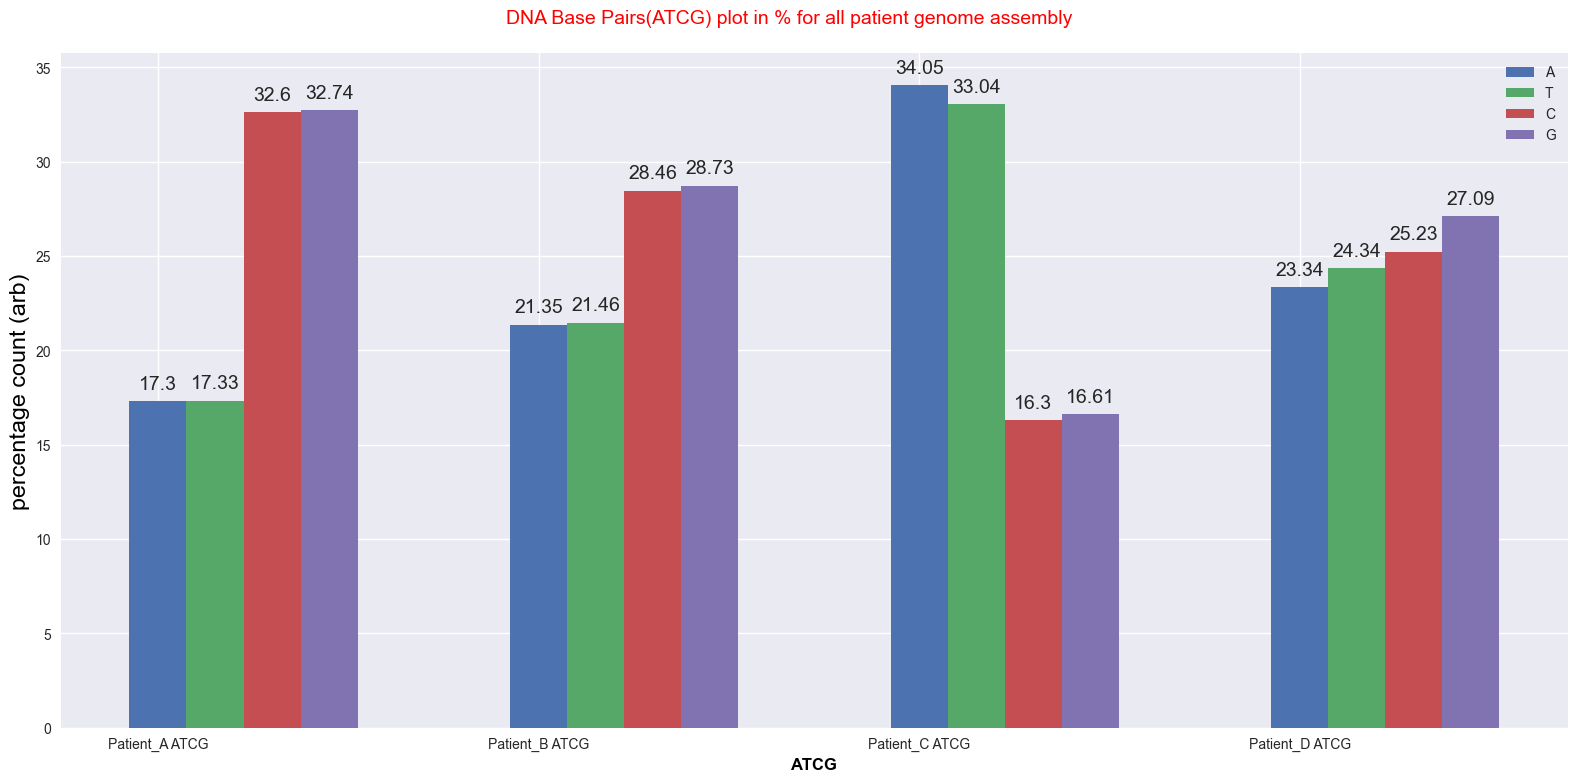

In [8]:
############### Question 5 ################################



"""
This function plots the atcg contents (in percentage) for each of the patient genome
param: ax represents the axes to be plotted
param: title_patient represents the name of the patient, which in this case serves as the title.
param: atcg represents a list showing a,t,c and g contents in percentage of the assembled genome.
"""

def show_atcg_plot(axes, frag_patient_a, frag_patient_t, frag_patient_c, frag_patient_g):
    width = 0.15  # set the widths of the bars
    labels = ["Patient_A ATCG", "Patient_B ATCG", "Patient_C ATCG", "Patient_D ATCG"]  # define the labels of the plot. ATCG labels
    label_location = np.arange(len(labels))
    
    a_neucleotide = np.arange(len(frag_patient_a))
    t_neucleotide = [x + width for x in a_neucleotide]
    c_neucleotide = [x + width for x in t_neucleotide]
    g_neucleotide = [x + width for x in c_neucleotide]
    
    x = np.arange(len(labels))

    firstrect = axes.bar(a_neucleotide, frag_patient_a, width,label='A')
    secondrect = axes.bar(t_neucleotide, frag_patient_t, width, label='T')
    thirdrect = axes.bar(c_neucleotide, frag_patient_c, width, label='C')
    fourthrec = axes.bar(g_neucleotide, frag_patient_g, width, label='G')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axes.set_ylabel('percentage count (arb)')
    axes.set_xticks(label_location)
    axes.set_xlabel('ATCG', fontweight='bold', fontsize=12)

    axes.set_xticklabels(labels)
    axes.legend()
    axes.bar_label(firstrect, padding=6)
    axes.bar_label(secondrect, padding=6)
    axes.bar_label(thirdrect, padding=6)
    axes.bar_label(fourthrec, padding=6)


"""
This function computes the a,t,g and c content of the fasta file realised from either best assembly (spades)
param: filename represents the name of the fasta file (precisely, scaffolds.fasta for spades)
param: file_extension represents the extension of the fasta file.

return total
modified from: http://biopython.org/DIST/docs/tutorial/Tutorial.html#sec12

"""

def get_atcg_content(filename, file_extension):
    # initialising total length of assembly and a,t,g and c content to 0
    total_length = a_count = t_count = g_count = c_count = n_count = 0
    
    for record in SeqIO.parse(filename,file_extension):
        total_length += len(record.seq)
        # count the total number of G and C in each sequence, add the result to the computed value in the previous sequence.
        a_count += record.seq.count('A')
        t_count += record.seq.count('T')
        c_count += record.seq.count('C')
        g_count += record.seq.count('G')
        n_count += record.seq.count('N')
        
    return [round(float(a_count/total_length)*100,2),round(float(t_count/total_length)*100,2),
            round(float(c_count/total_length)*100,2), round(float(g_count/total_length)*100,2),
           round(float(n_count/total_length)*100,2)]

# get the atcg content of the patient A, B, C and D
atcg_a = get_atcg_content(patient_a_scaffold_data,"fasta")
atcg_b = get_atcg_content(patient_b_scaffold_data,"fasta")
atcg_c = get_atcg_content(patient_c_scaffold_data,"fasta")
atcg_d = get_atcg_content(patient_d_scaffold_data,"fasta")

# get the necleotide for each patient
# the A_neo contains the neocleotide for all patients (A to D)
A_neo = [atcg_a[0], atcg_b[0], atcg_c[0], atcg_d[0]]
# the T_neo contains the neocleotide for all patients (A to D)
T_neo = [atcg_a[1], atcg_b[1], atcg_c[1], atcg_d[1]]
# the C_neo contains the neocleotide for all patients (A to D)
C_neo = [atcg_a[2], atcg_b[2], atcg_c[2], atcg_d[2]]
# the G_neo contains the neocleotide for all patients (A to D)
G_neo = [atcg_a[3], atcg_b[3], atcg_c[3], atcg_d[3]]


# show the percentage of each letter in a tabular form
result = pd.DataFrame([atcg_a,atcg_b,atcg_c,atcg_d], columns=["A%","T%","C%","G%","N%"], index=["patient_A","patient_B","patient_C","patient_D"])
display(result)
result.to_csv("atcg_content_q5.csv", header=["A%","T%","C%","G%","N%"])
result.to_html("atcg_content_q5.html")
fig, ax = plt.subplots(figsize=(16,8))
show_atcg_plot(ax,A_neo,T_neo, C_neo, G_neo)



plt.savefig("question5.png")
plt.suptitle("DNA Base Pairs(ATCG) plot in % for all patient genome assembly", fontsize=14, color='red')
plt.tight_layout()
plt.show()


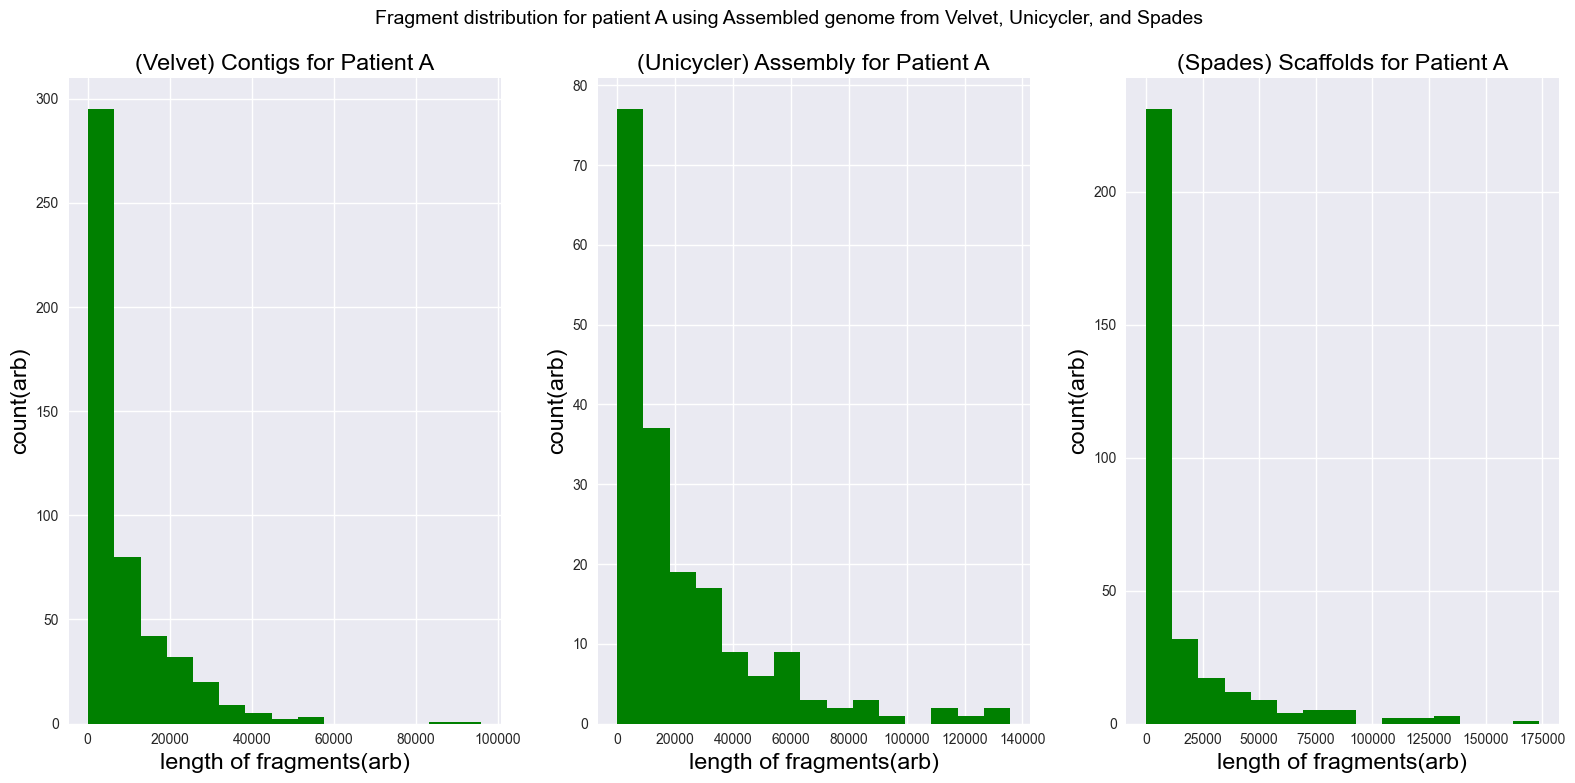

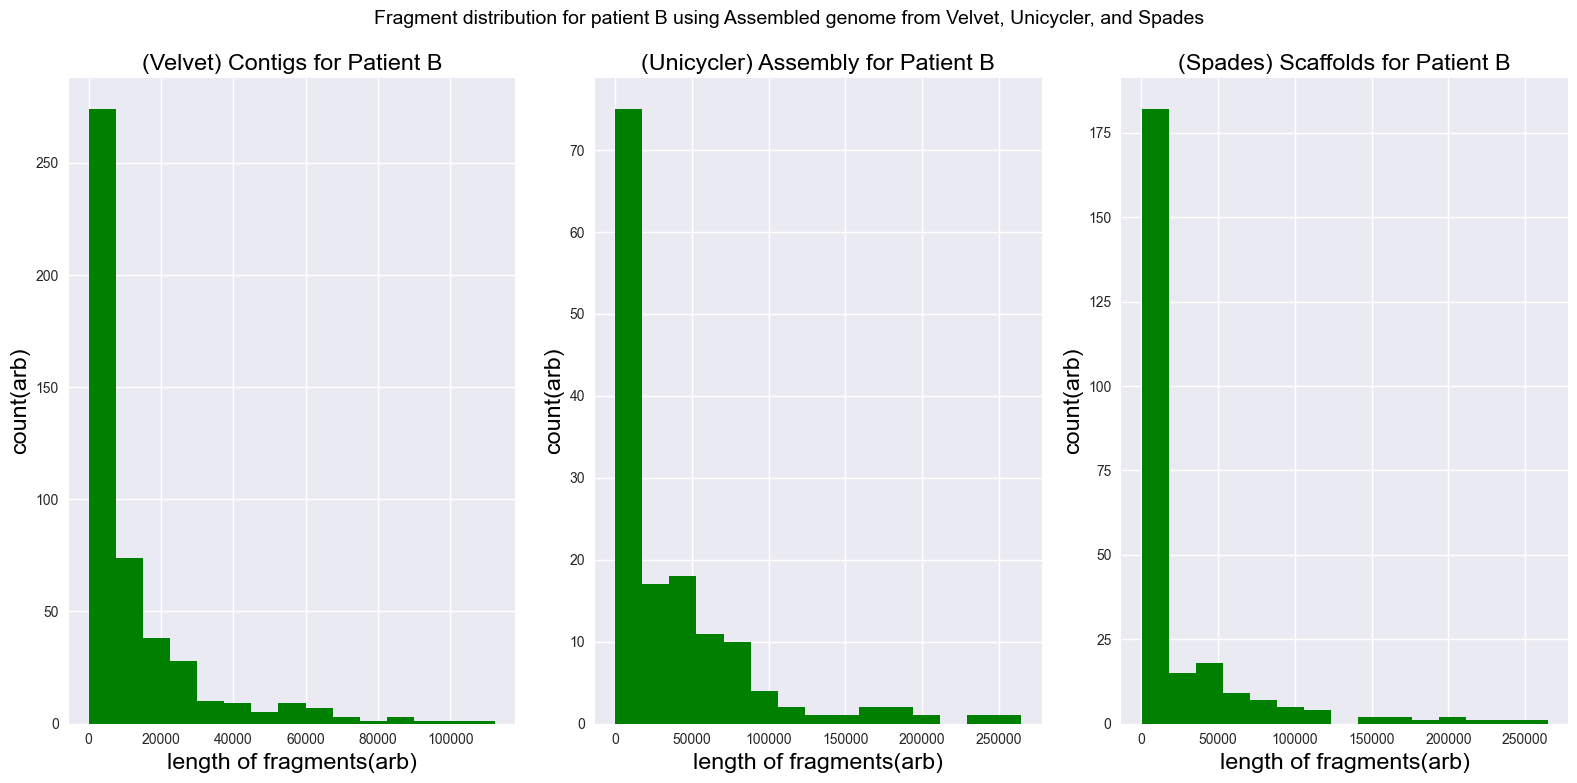

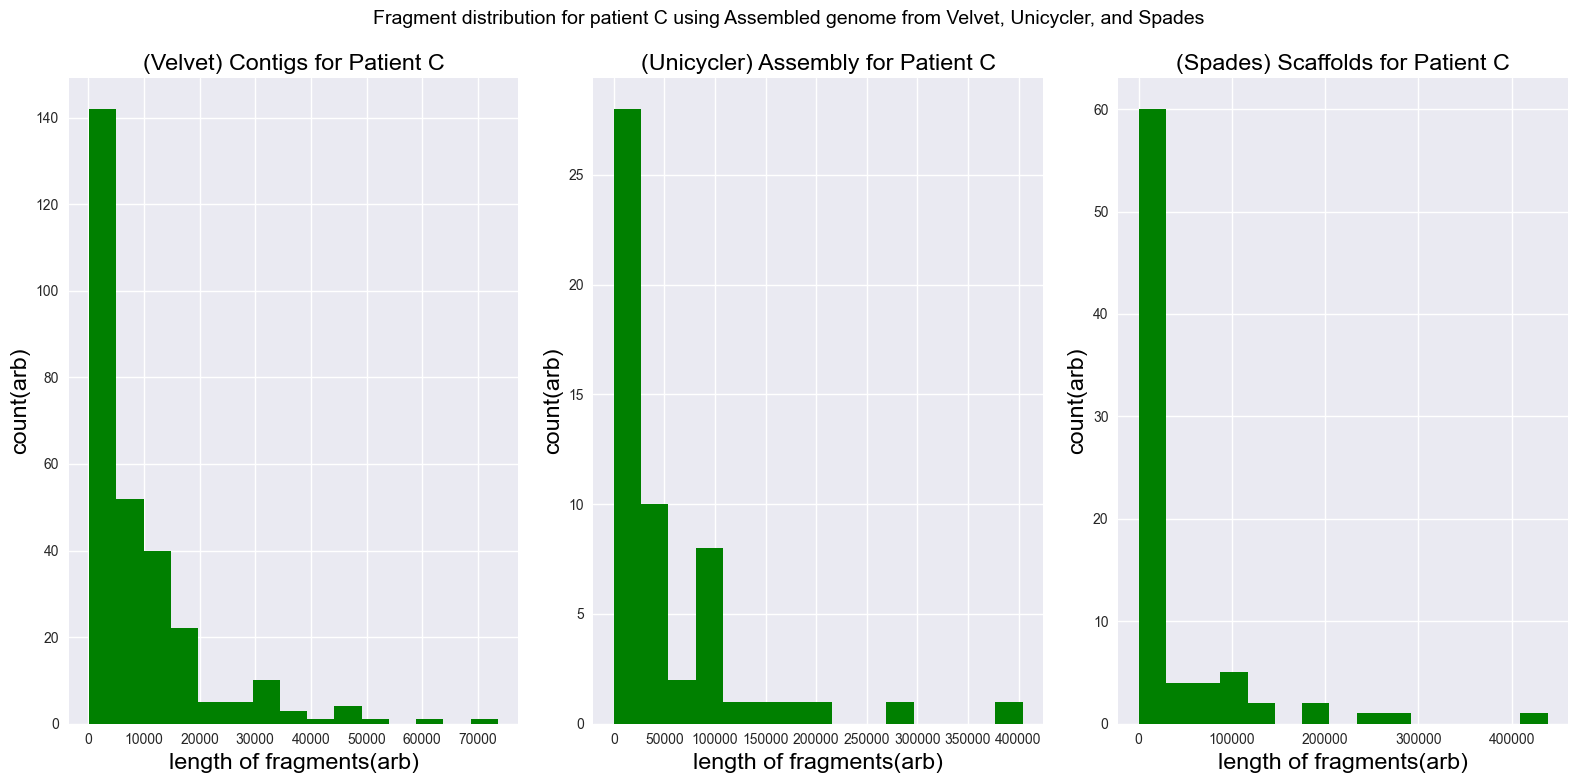

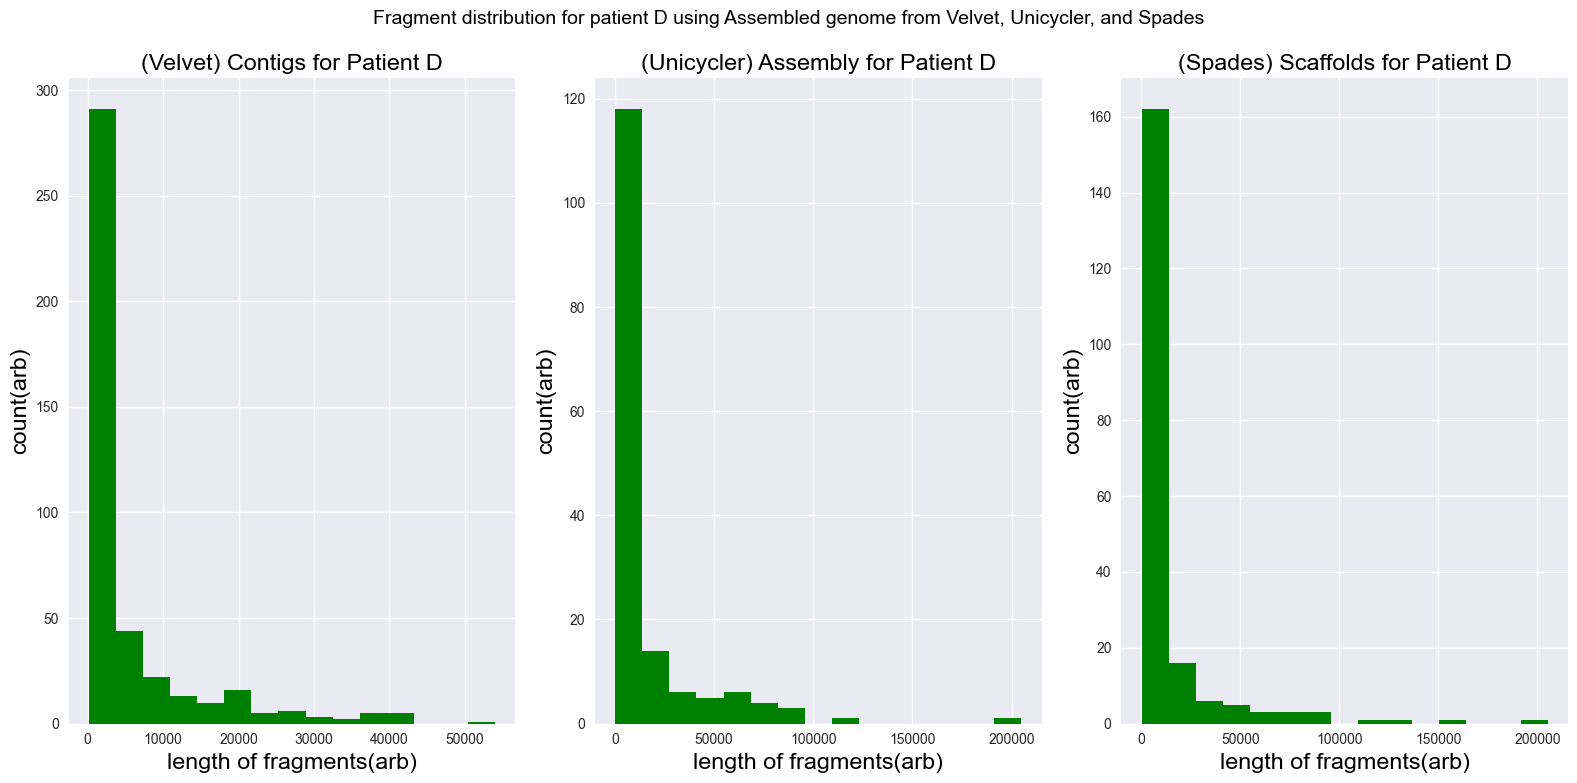

In [9]:
############################# Question 6 ###########################################


"""
This function plots a histogram distrubution for fragments as contained in each assembled genome
param: ax represents the axis to be plotted
param: value represents list of length of fragments
"""
def plot_hist(ax, value, title):
    ax.hist(value, bins=15, lw=0, color='green', ec='black')
    ax.set_xlabel("length of fragments(arb)")
    ax.set_ylabel("count(arb)")
    ax.set_title(title)
    


"""
This function computes the length of each fragment as contained in the assembled files.
param: filename represents the name of the fasta file (precisely, scaffolds.fasta for spades)
param: file_extension represents the extension of the fasta file.
return total
modified from: http://biopython.org/DIST/docs/tutorial/Tutorial.html#sec12
"""

def get_fragments(filename, file_extension):
    # initialising total length of assembly and a,t,g and c content to 0
    fragments = [] 
    records =[]
    for record in SeqIO.parse(filename,file_extension):
        fragments.append(len(record.seq))
        records.append(record.seq)
        # count the total number of G and C in each sequence, add the result to the computed value in the previous sequence.
        
    return fragments,records

# Fragment computation for patient A using unicycler, spades and velvet
fragment_a_unicycler, _ = get_fragments(patient_a_unicycler_data,  "fasta")  # for unicycler 
fragment_a_spades, _ = get_fragments(patient_a_scaffold_data, "fasta")  # for spades
fragment_a_velvet, _ = get_fragments(patient_a_velvet_data, "fasta")  # for velvet

# Fragment computation for patient B using unicycler, spades and velvet
fragment_b_unicycler, _ = get_fragments(patient_b_unicycler_data, "fasta")  # for unicycler
fragment_b_spades, _ = get_fragments(patient_b_scaffold_data, "fasta")  # for spades
fragment_b_velvet, _ = get_fragments(patient_b_velvet_data, "fasta")  # for velevt

# Fragment computation for patient C using unicycler, spades and velvet
fragment_c_unicycler, _ = get_fragments(patient_c_unicycler_data, "fasta")
fragment_c_spades, _ = get_fragments(patient_c_scaffold_data, "fasta")
fragment_c_velvet, _ = get_fragments(patient_c_velvet_data, "fasta")

# Fragment computation for patient D
fragment_d_unicycler, _ = get_fragments(patient_d_unicycler_data, "fasta")
fragment_d_spades, _ = get_fragments(patient_d_scaffold_data, "fasta")
fragment_d_velvet, _ = get_fragments(patient_d_velvet_data, "fasta")


# plotting the histogram distribution for patient A
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
plot_hist(ax[0],fragment_a_velvet, "(Velvet) Contigs for Patient A")
plot_hist(ax[1],fragment_a_unicycler, "(Unicycler) Assembly for Patient A")
plot_hist(ax[2],fragment_a_spades, "(Spades) Scaffolds for Patient A")
plt.suptitle("Fragment distribution for patient A using Assembled genome from Velvet, Unicycler, and Spades",
             fontsize=14, color='black')
plt.tight_layout()
plt.savefig("question6a.png")

plt.show()


# plotting the histogram distribution for patient B
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
plot_hist(ax[0],fragment_b_velvet, "(Velvet) Contigs for Patient B")
plot_hist(ax[1],fragment_b_unicycler, "(Unicycler) Assembly for Patient B")
plot_hist(ax[2],fragment_b_spades, "(Spades) Scaffolds for Patient B")
plt.suptitle("Fragment distribution for patient B using Assembled genome from Velvet, Unicycler, and Spades",
             fontsize=14, color='black')
plt.tight_layout()
plt.savefig("question6b.png")

plt.show()


# plotting the histogram distribution for patient C
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
plot_hist(ax[0],fragment_c_velvet, "(Velvet) Contigs for Patient C")
plot_hist(ax[1],fragment_c_unicycler, "(Unicycler) Assembly for Patient C")
plot_hist(ax[2],fragment_c_spades, "(Spades) Scaffolds for Patient C")
plt.suptitle("Fragment distribution for patient C using Assembled genome from Velvet, Unicycler, and Spades",
             fontsize=14, color='black')
plt.tight_layout()
plt.savefig("question6c.png")

plt.show()


# plotting the histogram distribution for patient D
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
plot_hist(ax[0],fragment_d_velvet, "(Velvet) Contigs for Patient D")
plot_hist(ax[1],fragment_d_unicycler, "(Unicycler) Assembly for Patient D")
plot_hist(ax[2],fragment_d_spades, "(Spades) Scaffolds for Patient D")

plt.suptitle("Fragment distribution for patient D using Assembled genome from Velvet, Unicycler, and Spades",
             fontsize=14, color='black')
plt.tight_layout()
plt.savefig("question6d.png")

plt.show()